In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def set_y(a, x, b):
    count = x.size
    y = np.zeros(shape = (count,))
    for i in range (count):
        y[i] = a * x[i] + b
    return y


count = 200
random_range = 20

step_a = 0.00001
step_b = 1.0

iter = 100

a = 0.35
b = 37

x = np.arange(count)
y = np.zeros(shape = (count,))

for i in range(count):
    y[i] = a * x[i] + b + np.random.uniform(- count / 20, count / 20)



a_reg = np.random.uniform(- count / 20, count / 20)
b_reg = np.random.uniform(- count / 2, count / 2)
y_reg = set_y(a_reg, x, b_reg)


In [4]:
def loss(reg, truth):
    count = reg.size
    sum = 0
    for i in range (count):
        sum += (reg[i] - truth[i]) * (reg[i] - truth[i])
    sum = sum / count
    return sum


def dif_loss_a(a, x, b, y):
    count = x.size
    sum = 0

    for i in range(count):
        sum += 2 * (a * x[i] + b - y[i]) * x[i]

    sum = sum / count
    return sum


def dif_loss_b(a, x, b, y):
    count = x.size
    sum = 0

    for i in range(count):
        sum += 2 * (a * x[i] + b - y[i])

    sum = sum / count
    return sum



Let's see how dif_loss_a and diff_loss_b behave for different values of a and b

In [6]:
a1 = np.arange(-10, 10, 0.1)
loss_a1= dif_loss_a(a1, x, b, y)

[-274027.83339718 -271381.13339718 -268734.43339718 -266087.73339718
 -263441.03339718 -260794.33339718 -258147.63339718 -255500.93339718
 -252854.23339718 -250207.53339718 -247560.83339718 -244914.13339718
 -242267.43339718 -239620.73339718 -236974.03339718 -234327.33339718
 -231680.63339718 -229033.93339718 -226387.23339718 -223740.53339718
 -221093.83339718 -218447.13339718 -215800.43339718 -213153.73339718
 -210507.03339718 -207860.33339718 -205213.63339718 -202566.93339718
 -199920.23339718 -197273.53339718 -194626.83339718 -191980.13339718
 -189333.43339718 -186686.73339718 -184040.03339718 -181393.33339718
 -178746.63339718 -176099.93339718 -173453.23339718 -170806.53339718
 -168159.83339718 -165513.13339718 -162866.43339718 -160219.73339718
 -157573.03339718 -154926.33339718 -152279.63339718 -149632.93339718
 -146986.23339718 -144339.53339718 -141692.83339718 -139046.13339718
 -136399.43339718 -133752.73339718 -131106.03339718 -128459.33339718
 -125812.63339718 -123165.93339718

<IPython.core.display.Javascript object>


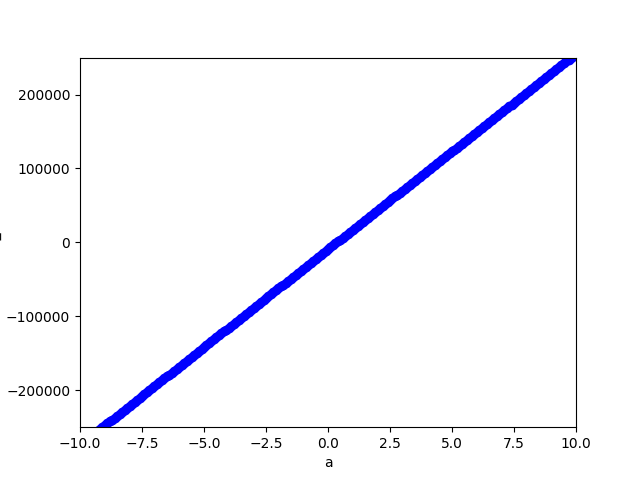

In [9]:
fig,(la1) = plt.subplots(1,1, sharex = False, sharey = False)

la1.set_xlabel('a')
la1.set_ylabel('loss_a')
la1.set_xlim(-10,10)
la1.set_ylim(-250000, 250000)
la1.scatter(a1, loss_a1, color = 'b')

In [10]:
b1 = np.arange(-100, 100, 1)
loss_b1= dif_loss_a(a, x, b1, y)

<IPython.core.display.Javascript object>


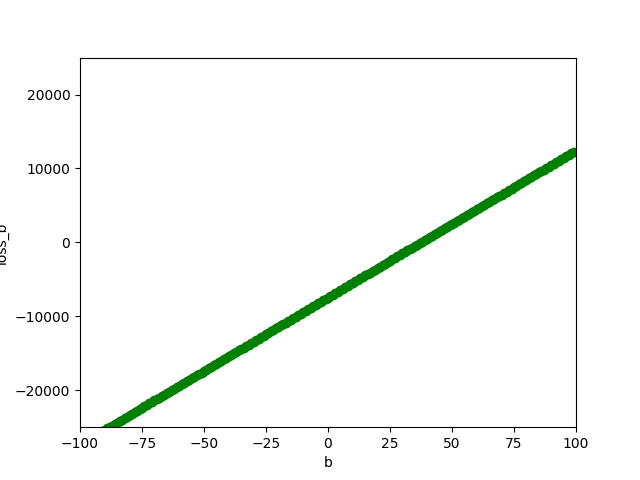

In [18]:
fig,(lb1) = plt.subplots(1,1, sharex = False, sharey = False)

lb1.set_xlabel('b')
lb1.set_ylabel('loss_b')
lb1.set_xlim(-100,100)
lb1.set_ylim(-25000, 25000)
lb1.scatter(b1, loss_b1, color = 'g')

<IPython.core.display.Javascript object>


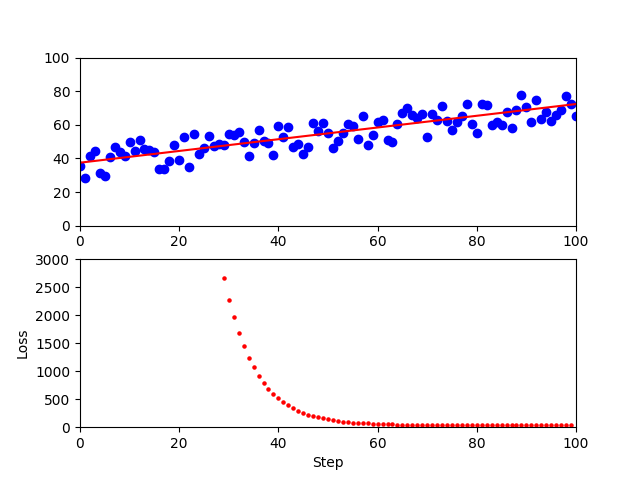

(0, 3000)

In [14]:
fig,(ax1, ax2) = plt.subplots(2,1, sharex = False, sharey = False)

ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_xlim(0,100)
ax1.set_ylim(0, 100)
ax1.scatter(x, y, color = 'b')

ax2.set_xlabel("Step")
ax2.set_ylabel("Loss")
ax2.set_xlim(0, iter)
ax2.set_ylim(0, 3000)

In [15]:

l = loss(y_reg, y)
for i in range(iter):
    a_reg = a_reg - dif_loss_a(a_reg, x, b_reg, y) * step_a
    b_reg = b_reg - dif_loss_b(a_reg, x, b_reg, y) * step_b
    y_reg = set_y(a_reg, x, b_reg)

    l = loss(y_reg, y)
    ax1.clear()
    
    ax1.set_xlim(0,100)
    ax1.set_ylim(0, 100)

    ax1.scatter(x, y, color = 'b')
    ax1.plot(x, y_reg, color = 'r')
    
    ax2.scatter(i, l, color = 'r', s=5)
    fig.canvas.draw()
